# PCA : House prices 

## We load the libs

In [1]:
import pandas as pd
import sklearn 
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#vérification - librairie numpy
import numpy as np
#classe pour l'ACP
from sklearn.decomposition import PCA
from pprint import pprint
from matplotlib import pyplot as plt

%matplotlib inline

## We load ours data

In [2]:
filename = 'data_quali_num.csv'
data = pd.read_csv(filename, index_col=0)

## We select numeric columns

In [3]:
data_num = data.select_dtypes(exclude=['object'])
print(data_num)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1             60         65.0     8450            7            5       2003   
2             20         80.0     9600            6            8       1976   
3             60         68.0    11250            7            5       2001   
4             70         60.0     9550            7            5       1915   
5             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1456          60         62.0     7917            6            5       1999   
1457          20         85.0    13175            6            6       1978   
1458          70         66.0     9042            7            9       1941   
1459          20         68.0     9717            5            6       1950   
1460          20         75.0     9937            5 

## We convert all columns in float64

In [4]:
data_float = data_num.astype('float64')
data_ok = data_float.dropna()

## We get the shape of ours data
* we keep the number of observations in the variable n
* we keep the number of features in the variable p

In [5]:
data_ok.shape

(1121, 61)

In [6]:
n = data_ok.shape[0]

p = data_ok.shape[1]

## We standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

* instanciation
* transformation - centering-reduction

In [7]:
sc = StandardScaler()

data_cr = sc.fit_transform(data_ok)

## We calculate the mean

In [8]:
np.mean(data_cr,axis=0)


array([-3.84269878e-17, -2.34523472e-16,  3.16923611e-18,  2.66215833e-16,
       -1.42615625e-16, -1.81597229e-15, -1.78744917e-15, -6.33847222e-18,
        1.26769444e-17, -1.58461805e-18,  1.04980946e-16,  1.29938680e-16,
       -1.30730990e-16,  2.69385069e-17,  3.80308333e-17,  1.93323403e-16,
        3.01077430e-17, -2.21846528e-17, -2.18677292e-16, -6.02154861e-17,
        9.82463194e-17, -3.58123680e-16, -1.44200243e-16, -2.85231250e-17,
        1.48161788e-16, -1.45784861e-16, -2.06000347e-17, -6.33847222e-18,
       -5.66500955e-17,  1.70346441e-17, -6.33847222e-18, -2.06000347e-17,
       -1.26769444e-17, -1.90154167e-17, -1.36277153e-16,  3.64937538e-14,
        8.87386111e-17,  7.66955139e-16, -2.69385069e-17,  1.99661875e-16,
        0.00000000e+00,  3.35939028e-16, -8.39847569e-17, -1.91738785e-16,
        3.32769792e-17,  2.85231250e-16,  6.46524166e-16,  3.97739132e-16,
        5.07077778e-17,  9.38886197e-16,  1.02683250e-15, -8.31924479e-17,
       -1.26769444e-16,  

## We compute the standard deviation

In [9]:
np.std(data_cr,axis=0,ddof=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## We initialyse the model

In [10]:
acp = PCA(svd_solver='full')

## We print the settings

In [11]:
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


## We calculate the coordinates
* number of computed components : 6

In [12]:
coord = acp.fit_transform(data_cr)

print(acp.n_components_) # 6

61


In [13]:
pprint(coord[1])

array([ 4.57797823e-01, -1.88091993e+00,  1.14550156e+00, -3.25322485e-01,
       -7.44716322e-01, -2.98325072e-01, -1.37567497e+00, -8.21328260e-01,
       -4.88515876e-03,  1.52027023e+00, -5.84523143e-01, -2.71637801e+00,
       -7.46020623e-01, -1.31885135e-01,  9.64020564e-01,  2.35960073e+00,
       -3.42415069e-01,  3.18516676e-01,  1.41123624e+00, -2.99266041e-01,
       -9.14971160e-01, -5.68546000e-01,  2.76055672e-01,  1.17202838e+00,
       -3.86040135e-01, -1.50272085e+00,  8.75784851e-01,  1.16268108e+00,
       -2.55186655e-02, -4.32449952e-01, -1.01681897e+00, -5.14226190e-01,
       -2.86887264e-01, -2.76739874e-02,  1.43979115e+00,  3.95995660e-01,
       -1.51610657e-01, -3.84223711e-01,  2.05674671e-01,  9.91739868e-02,
        9.54993138e-01,  9.07667309e-02,  4.17783442e-01, -3.47085923e-01,
       -2.61526813e-01,  5.51495018e-02, -6.20859010e-01, -1.13334254e+00,
       -3.78843849e-02, -2.90978575e-01, -4.25085752e-01, -6.32880972e-01,
       -1.28495131e-01, -

## Explained variance

In [14]:
print(acp.explained_variance_)

[1.18319444e+01 3.95943928e+00 3.34124965e+00 2.48968656e+00
 2.15528029e+00 1.87203450e+00 1.75816006e+00 1.59994508e+00
 1.42917254e+00 1.40958393e+00 1.30749995e+00 1.26851055e+00
 1.21980091e+00 1.16185444e+00 1.12145996e+00 1.07522743e+00
 1.04489174e+00 9.92467159e-01 9.57944120e-01 9.43120040e-01
 9.03341361e-01 8.97932980e-01 8.77772217e-01 8.58320744e-01
 7.87775680e-01 7.68163981e-01 7.52914030e-01 7.32776066e-01
 6.98920431e-01 6.79348954e-01 6.38243103e-01 6.29839294e-01
 6.09942190e-01 5.72331399e-01 5.58224735e-01 5.16347277e-01
 5.02182478e-01 4.73062905e-01 4.32489862e-01 3.78190936e-01
 3.68176039e-01 3.48599047e-01 3.36710186e-01 3.19641744e-01
 2.90215734e-01 2.64192045e-01 2.53837066e-01 2.19593992e-01
 2.06400542e-01 1.95263207e-01 1.71753664e-01 1.65226105e-01
 1.52459774e-01 1.41769137e-01 1.19781619e-01 1.03610274e-01
 9.97718524e-02 8.91761738e-02 2.33343959e-30 6.72329016e-32
 6.72329016e-32]


## Corrected value

In [15]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.18213896e+01 3.95590722e+00 3.33826905e+00 2.48746561e+00
 2.15335765e+00 1.87036453e+00 1.75659168e+00 1.59851783e+00
 1.42789763e+00 1.40832650e+00 1.30633358e+00 1.26737896e+00
 1.21871277e+00 1.16081799e+00 1.12045955e+00 1.07426826e+00
 1.04395964e+00 9.91581818e-01 9.57089576e-01 9.42278720e-01
 9.02535525e-01 8.97131969e-01 8.76989191e-01 8.57555070e-01
 7.87072936e-01 7.67478733e-01 7.52242385e-01 7.32122385e-01
 6.98296952e-01 6.78742934e-01 6.37673751e-01 6.29277439e-01
 6.09398084e-01 5.71820845e-01 5.57726765e-01 5.15886664e-01
 5.01734501e-01 4.72640904e-01 4.32104054e-01 3.77853567e-01
 3.67847603e-01 3.48288075e-01 3.36409820e-01 3.19356604e-01
 2.89956844e-01 2.63956370e-01 2.53610628e-01 2.19398101e-01
 2.06216420e-01 1.95089021e-01 1.71600449e-01 1.65078713e-01
 1.52323770e-01 1.41642670e-01 1.19674766e-01 1.03517847e-01
 9.96828499e-02 8.90966233e-02 2.33135803e-30 6.71729258e-32
 6.71729258e-32]


## proportion of variance explained

In [16]:
print(acp.explained_variance_ratio_)

[1.97023160e-01 6.59317869e-02 5.56378176e-02 4.14577602e-02
 3.58892941e-02 3.11727422e-02 2.92765280e-02 2.66419639e-02
 2.37982938e-02 2.34721083e-02 2.17722264e-02 2.11229826e-02
 2.03118796e-02 1.93469666e-02 1.86743259e-02 1.79044711e-02
 1.73993273e-02 1.65263636e-02 1.59514929e-02 1.57046453e-02
 1.50422588e-02 1.49521995e-02 1.46164865e-02 1.42925845e-02
 1.31178823e-02 1.27913122e-02 1.25373731e-02 1.22020398e-02
 1.16382825e-02 1.13123822e-02 1.06278959e-02 1.04879573e-02
 1.01566347e-02 9.53034741e-03 9.29544608e-03 8.59811106e-03
 8.36224169e-03 7.87734840e-03 7.20173424e-03 6.29755944e-03
 6.13079339e-03 5.80480126e-03 5.60683033e-03 5.32261006e-03
 4.83261406e-03 4.39927283e-03 4.22684380e-03 3.65663501e-03
 3.43694034e-03 3.25148368e-03 2.86000749e-03 2.75131188e-03
 2.53872950e-03 2.36071117e-03 1.99457944e-03 1.72529746e-03
 1.66138083e-03 1.48494372e-03 3.88559671e-32 1.11954876e-33
 1.11954876e-33]


## we showing scree plot

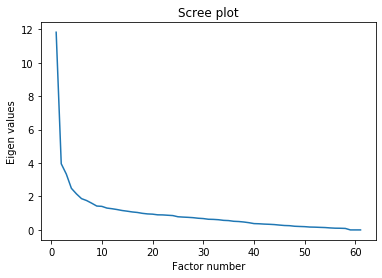

In [17]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


## We showing cumulative variance explained plot

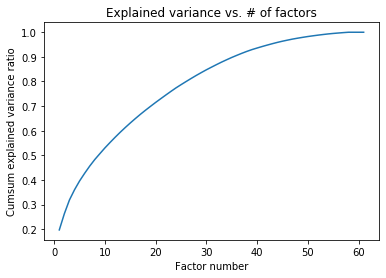

In [18]:
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


## Thresholds for testing broken sticks

In [19]:
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]


## broken sticks test

In [20]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


      Val.Propre    Seuils
0   1.182139e+01  4.696264
1   3.955907e+00  3.696264
2   3.338269e+00  3.196264
3   2.487466e+00  2.862931
4   2.153358e+00  2.612931
..           ...       ...
56  9.968285e-02  0.084795
57  8.909662e-02  0.067251
58  2.331358e-30  0.050009
59  6.717293e-32  0.033060
60  6.717293e-32  0.016393

[61 rows x 2 columns]


## We display the dimensions two by two

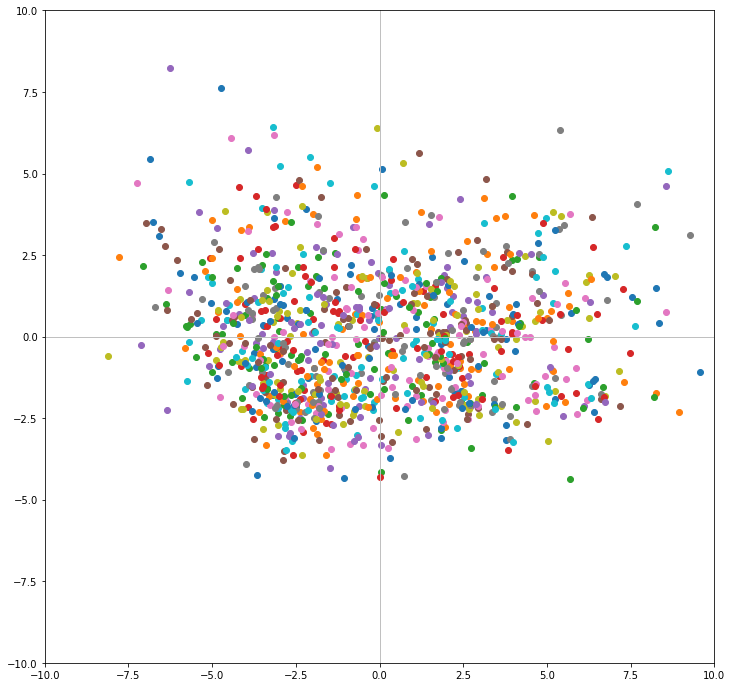

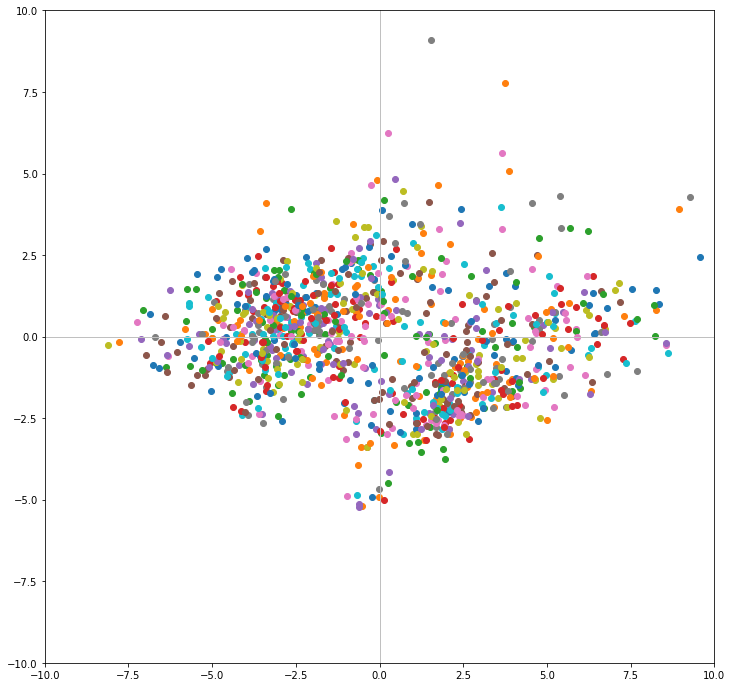

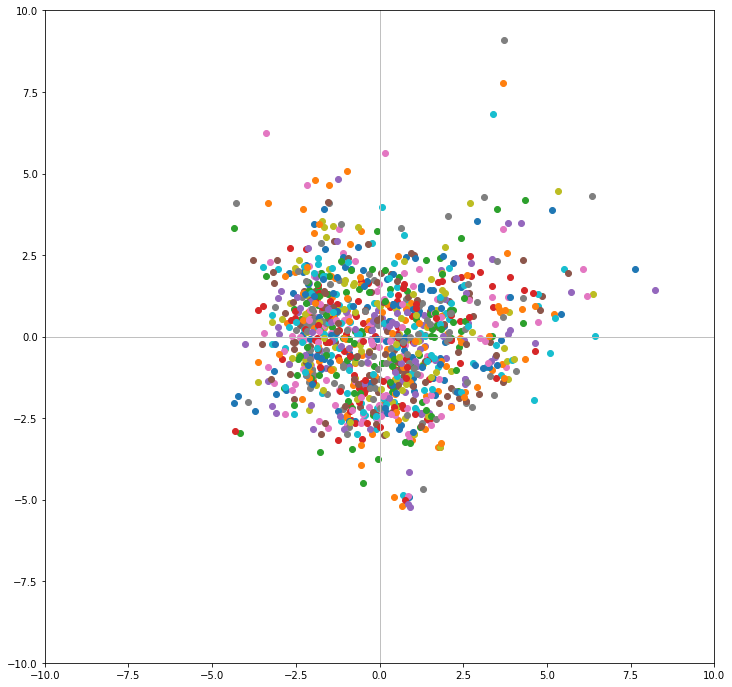

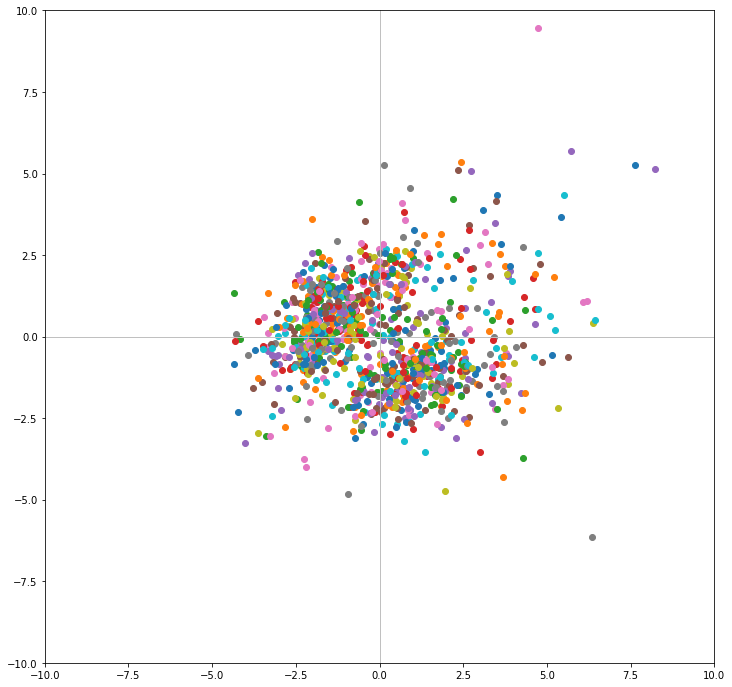

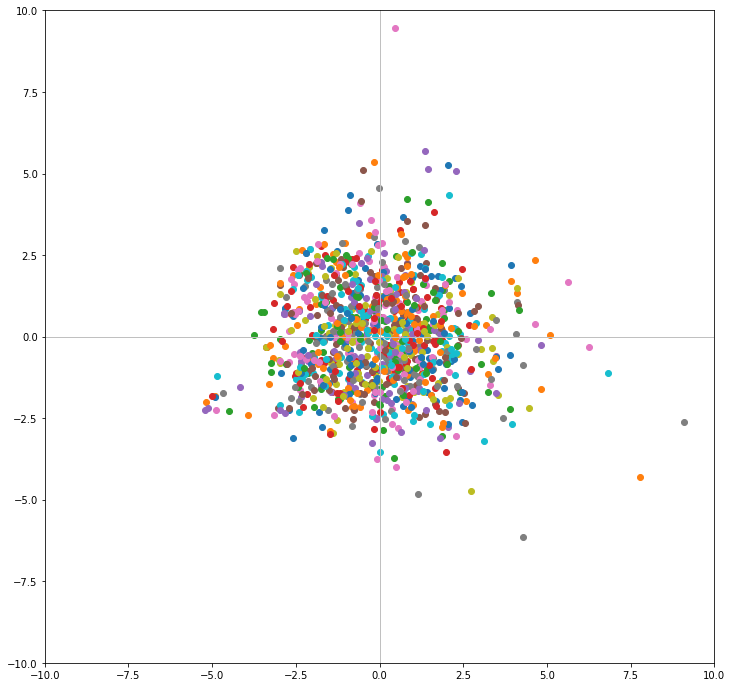

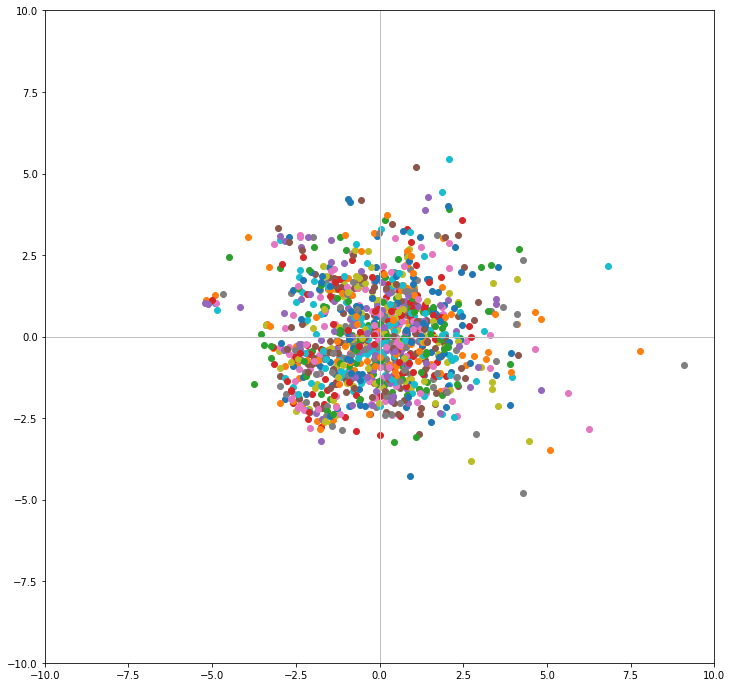

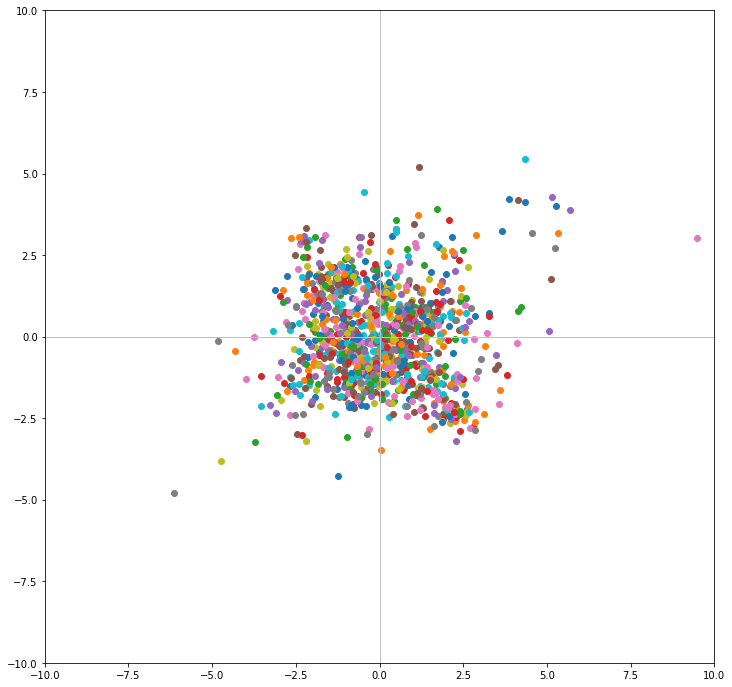

In [35]:
a1=[0,0,1,1,2,2,3]
a2=[1,2,2,3,3,4,4]

for a in range(7): 
    #positionnement des individus dans le premier plan
    fig, axes = plt.subplots(figsize=(12,12))
    axes.set_xlim(-10,10) #même limites en abscisse
    axes.set_ylim(-10,10) #et en ordonnée
    #placement des étiquettes des observations
    for i in range(n):
        
        plt.scatter(coord[i,a1[a]],coord[i,a2[a]])
    
    #ajouter les axes
    plt.plot([-10,10],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-10,10],color='silver',linestyle='-',linewidth=1)
    #affichage
    plt.show()

## contribution of individuals in total inertia

In [22]:
di = np.sum(data_cr**2,axis=1)
print(pd.DataFrame({'ID':data_ok.index,'d_i':di}))


        ID         d_i
0        1   23.047205
1        2   42.852981
2        3   18.859570
3        4   49.985517
4        5   40.014423
...    ...         ...
1116  1456   16.473895
1117  1457   45.792143
1118  1458  297.854970
1119  1459   83.489997
1120  1460   53.480697

[1121 rows x 2 columns]


## Quality of representation of individuals - COS2

In [23]:
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data_ok.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]}))

        id    COS2_1    COS2_2    COS2_3    COS2_4    COS2_5
0        1  0.146006  0.002480  0.096783  0.089309  0.195783
1        2  0.004891  0.082558  0.030620  0.002470  0.012942
2        3  0.366207  0.001465  0.041642  0.074246  0.084506
3        4  0.007655  0.013877  0.013941  0.010930  0.000754
4        5  0.593139  0.041610  0.003441  0.020136  0.064954
...    ...       ...       ...       ...       ...       ...
1116  1456  0.013739  0.116124  0.232288  0.030630  0.034375
1117  1457  0.031199  0.029468  0.262312  0.005971  0.011726
1118  1458  0.004225  0.012822  0.025329  0.075662  0.048536
1119  1459  0.094336  0.144236  0.054214  0.001666  0.005349
1120  1460  0.010132  0.091914  0.031839  0.012835  0.003467

[1121 rows x 6 columns]


## Online sum of cos2 = 1

In [24]:
print(np.sum(cos2,axis=1))


[1. 1. 1. ... 1. 1. 1.]


## Contributions to the axes

In [25]:
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':data_ok.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3],'CTR_5':ctr[:,4],'CTR_6':ctr[:,5]}))

        id     CTR_1     CTR_2     CTR_3     CTR_4     CTR_5         CTR_6
0        1  0.000254  0.000013  0.000596  0.000738  0.001869  1.261267e-05
1        2  0.000016  0.000798  0.000351  0.000038  0.000230  4.244706e-05
2        3  0.000521  0.000006  0.000210  0.000502  0.000660  3.428726e-08
3        4  0.000029  0.000156  0.000186  0.000196  0.000016  8.450020e-04
4        5  0.001791  0.000375  0.000037  0.000289  0.001077  3.795297e-05
...    ...       ...       ...       ...       ...       ...           ...
1116  1456  0.000017  0.000431  0.001023  0.000181  0.000235  3.783592e-04
1117  1457  0.000108  0.000304  0.003210  0.000098  0.000222  1.215831e-04
1118  1458  0.000095  0.000861  0.002016  0.008082  0.005989  6.781870e-04
1119  1459  0.000594  0.002716  0.001210  0.000050  0.000185  1.629139e-03
1120  1460  0.000041  0.001108  0.000455  0.000246  0.000077  6.677824e-06

[1121 rows x 7 columns]


In [26]:
np.sum(ctr,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## The components_ field of the PCA object

In [27]:
print(acp.components_)

[[-1.63199421e-02  1.13311296e-01  8.18150525e-02 ...  1.54377725e-01
   1.99211507e-01 -6.46836957e-02]
 [ 9.91358775e-02  5.03406210e-02  2.53529781e-02 ... -1.32859050e-01
  -5.40117644e-02 -2.59563990e-02]
 [-1.38757995e-01  2.51884570e-01  2.71890703e-01 ...  5.75560015e-04
  -7.44494598e-02  1.55878370e-01]
 ...
 [ 1.70272416e-16  5.30765134e-17  1.86897870e-16 ... -1.59594560e-16
  -2.08166817e-17  1.95969543e-16]
 [ 0.00000000e+00  4.57966998e-16  2.74539158e-16 ...  3.81639165e-17
   5.20417043e-18 -3.00866103e-17]
 [ 0.00000000e+00 -4.94396191e-17  6.32093815e-17 ...  7.97972799e-17
   1.09070739e-16  4.07795542e-17]]


## square root of eigenvalues

In [28]:
sqrt_eigval = np.sqrt(eigval)

## correlation of variables with axes
* We print the matrix of variable correlations x factors

In [29]:
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

print(corvar)

[[-5.61116293e-02  1.97175933e-01 -2.53523770e-01 ...  2.59985296e-31
   0.00000000e+00  0.00000000e+00]
 [ 3.89589703e-01  1.00124790e-01  4.60216550e-01 ...  8.10413885e-32
   1.18694697e-31 -1.28136320e-32]
 [ 2.81298540e-01  5.04257109e-02  4.96769617e-01 ...  2.85370343e-31
   7.11543457e-32  1.63824433e-32]
 ...
 [ 5.30785319e-01 -2.64249511e-01  1.05160171e-03 ... -2.43681506e-31
   9.89122473e-33  2.06816517e-32]
 [ 6.84933940e-01 -1.07426497e-01 -1.36026091e-01 ... -3.17845442e-32
   1.34880337e-33  2.82686707e-32]
 [-2.22397085e-01 -5.16258827e-02  2.84804289e-01 ...  2.99221686e-31
  -7.79776949e-33  1.05691389e-32]]


## We displays for the first six axes

In [30]:
ax = pd.DataFrame({'id':data_ok.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1],'COR_3':corvar[:,2],'COR_4':corvar[:,3],'COR_5':corvar[:,4], 'COR_6':corvar[:,5]})
ax

,id,COR_1,COR_2,COR_3,COR_4,COR_5,COR_6
0,MSSubClass,-0.056112,0.197176,-0.253524,-0.336133,0.513961,0.131530
1,LotFrontage,0.389590,0.100125,0.460217,0.230780,-0.197470,-0.195468
2,LotArea,0.281299,0.050426,0.496770,0.148790,-0.082525,-0.055083
3,OverallQual,0.851692,0.099062,-0.095917,-0.038702,-0.051052,0.133789
4,OverallCond,-0.246273,-0.060991,0.198335,-0.407187,-0.357893,0.164912
...,...,...,...,...,...,...,...
56,ElectricalNum,0.335179,-0.213588,-0.057541,-0.337195,-0.164298,-0.144768
57,FunctionalNum,0.116168,-0.151341,-0.127107,-0.123673,-0.005182,-0.066772
58,GarageTypeNum,0.530785,-0.264250,0.001052,0.066135,-0.054969,-0.219641
59,GarageFinishNum,0.684934,-0.107426,-0.136026,-0.005192,0.026069,-0.046866


## We only keeps the features that contributes to more than 0.5 on the axes
* we get the labels
* we get the nuber of values

In [31]:
ax_a = 1
ax_b = 2 
ax_c = 3
my_axes = []
labels = []
nbr_values = []

for a in range(4):
    ax1 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_b] > 0.5) | (ax.iloc[:,ax_b] < -0.5)]
    ax2 = ax[(ax.iloc[:,ax_a] > 0.5) | (ax.iloc[:,ax_a] < -0.5) | (ax.iloc[:,ax_c] > 0.5) | (ax.iloc[:,ax_c] < -0.5)]
    ax_np1 = ax1.iloc[:,[ax_a,ax_b]]
    ax_np2 = ax2.iloc[:,[ax_a,ax_c]]
    my_axes.append(np.asarray(ax_np1))
    my_axes.append(np.asarray(ax_np2))
    label1 = ax1['id'].values
    label2 = ax2['id'].values
    labels.append(label1)
    labels.append(label2)
    ax1_s = ax1.shape
    ax2_s = ax2.shape
    nbr_values.append(ax1_s[0])
    nbr_values.append(ax2_s[0])
    ax_a += 1
    ax_b += 1 
    ax_c += 1
    
print(my_axes)
print(labels)
print(nbr_values)


[array([[ 8.51691696e-01,  9.90621973e-02],
       [ 7.30826556e-01, -2.66411987e-01],
       [ 6.52432679e-01, -1.18167414e-01],
       [ 5.03266159e-01,  9.74623910e-02],
       [ 7.12093166e-01, -1.82723706e-01],
       [ 6.59351411e-01, -4.04032599e-02],
       [ 2.41263036e-01,  6.99118723e-01],
       [ 6.85386303e-01,  5.66724439e-01],
       [ 6.56103928e-01,  3.57561395e-01],
       [ 1.54357784e-01,  5.99787919e-01],
       [ 5.21898722e-01,  6.52233336e-01],
       [ 7.05920747e-01, -1.85726152e-01],
       [ 7.29559123e-01,  1.36249593e-01],
       [ 7.08501998e-01,  6.11479566e-02],
       [ 8.80234114e-01,  1.04802399e-01],
       [ 7.80573182e-01,  3.58220449e-02],
       [ 5.49841468e-01, -5.74193934e-02],
       [ 7.35637373e-01, -6.80097916e-04],
       [ 7.39363349e-01, -1.82621999e-01],
       [ 5.43342622e-01,  1.70939674e-01],
       [ 3.71321693e-01, -5.50325932e-01],
       [ 5.30785319e-01, -2.64249511e-01],
       [ 6.84933940e-01, -1.07426497e-01]]), array([[

## We display the correlation circles for the first six dimentions

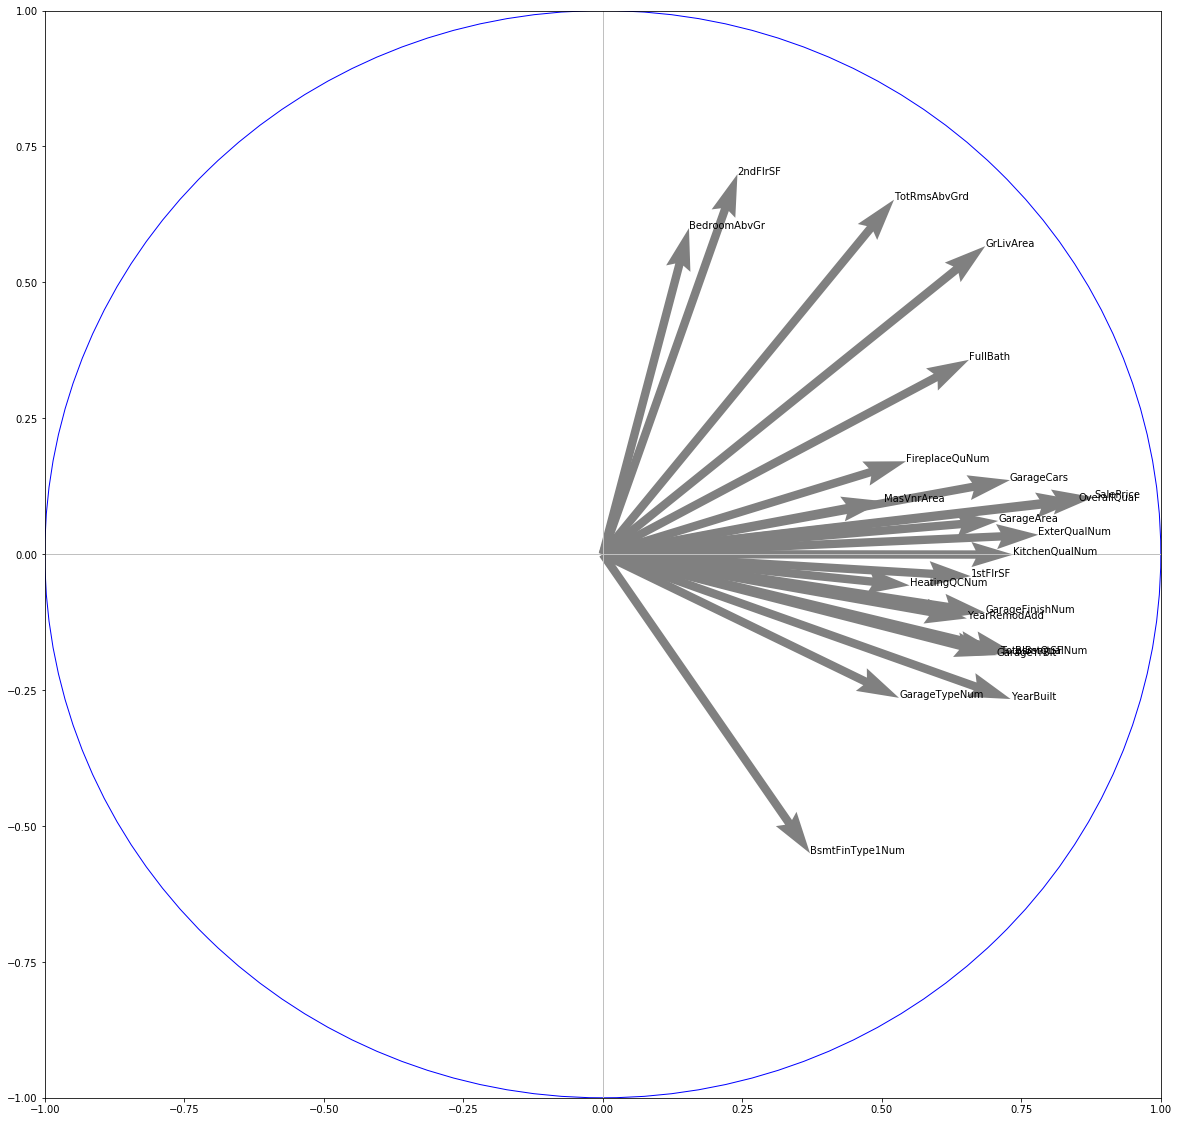

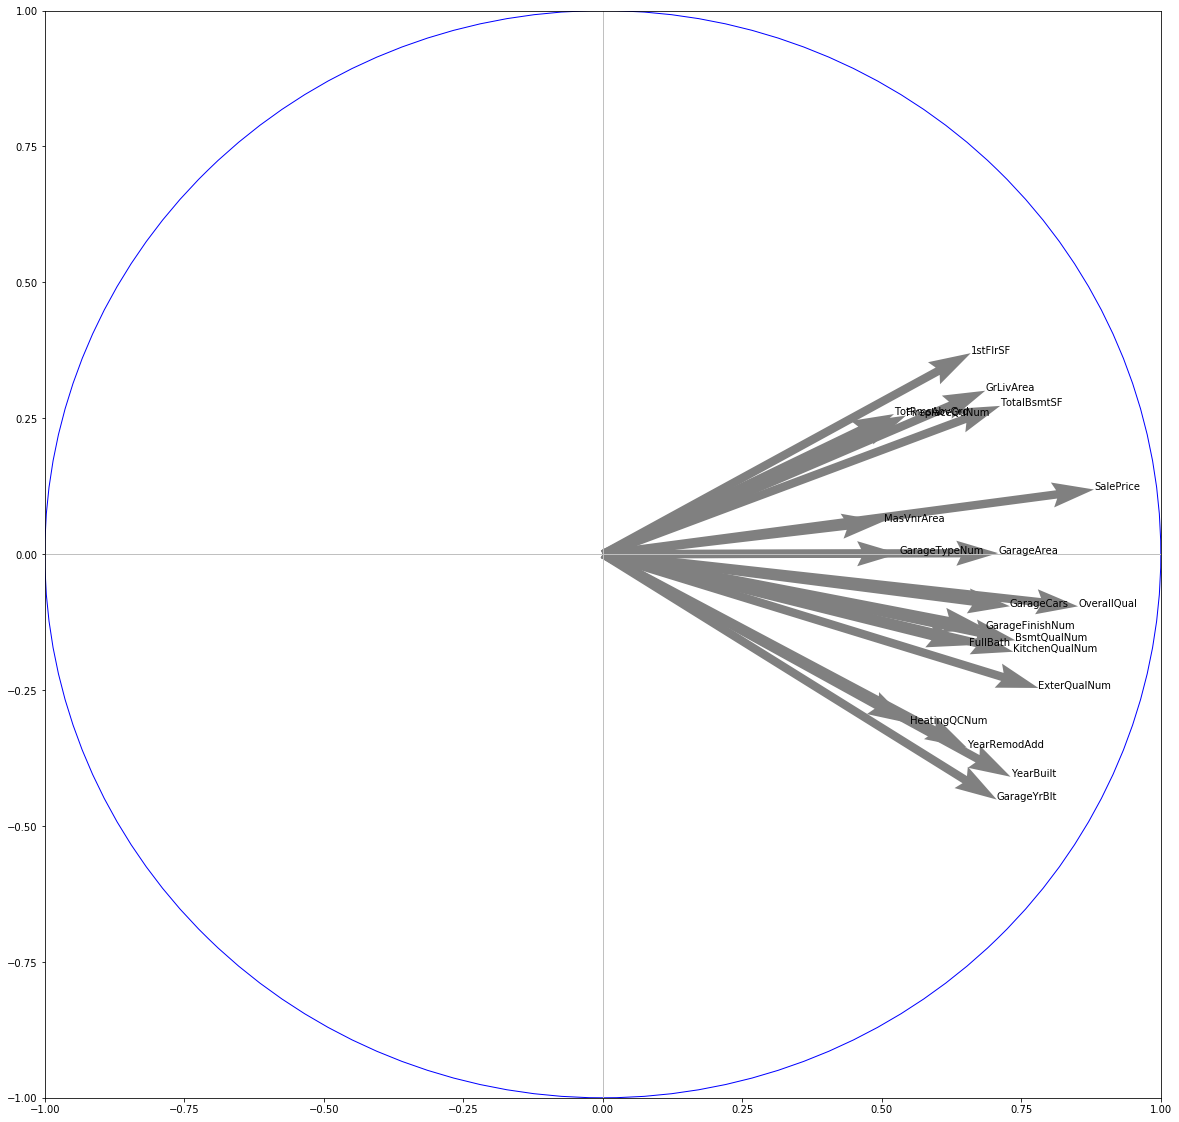

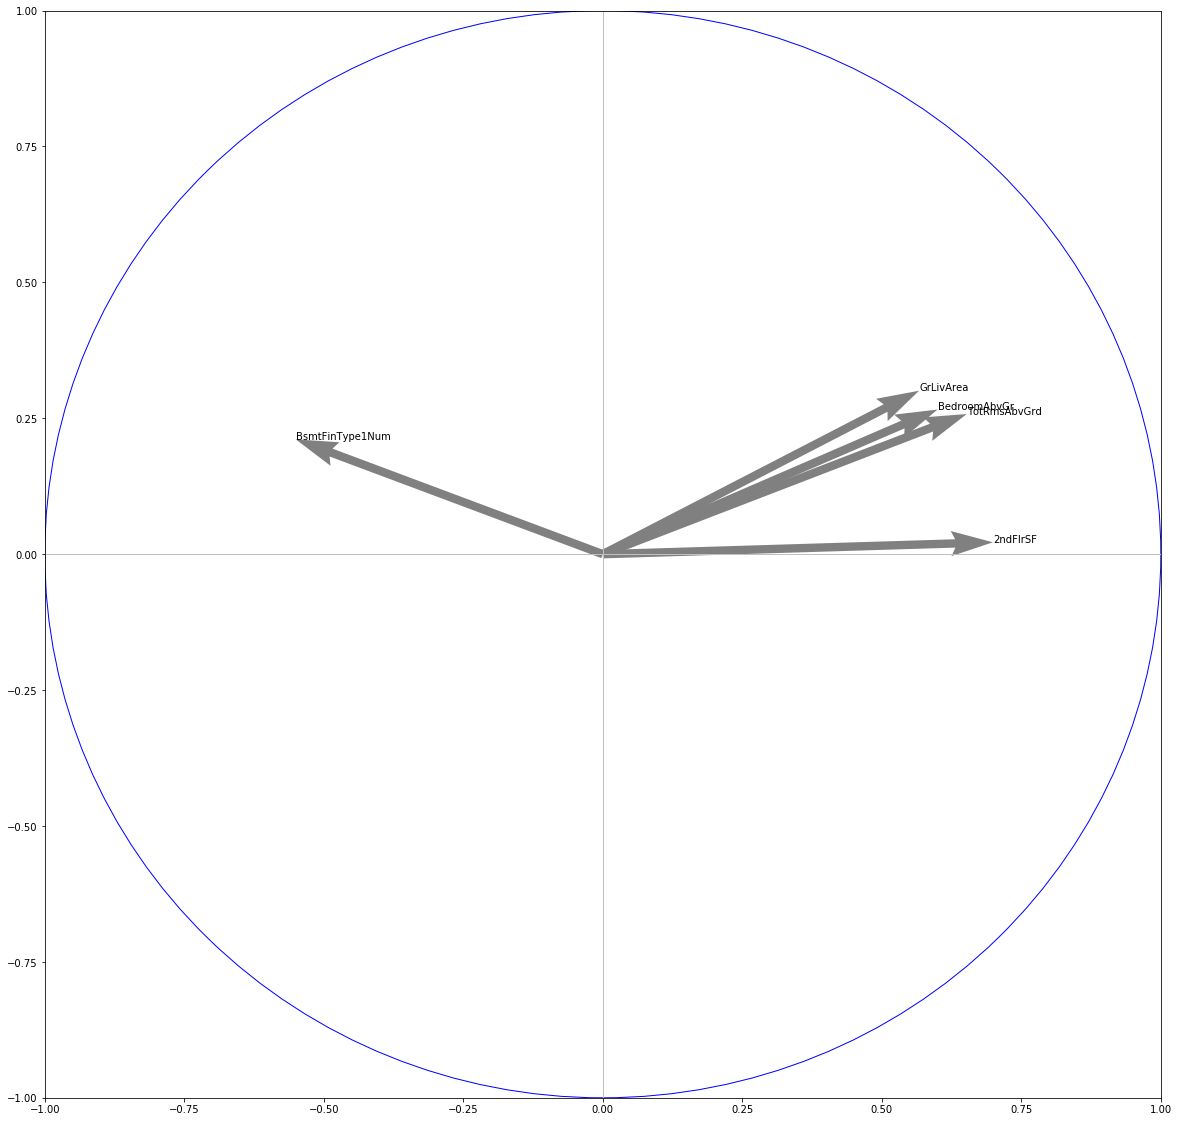

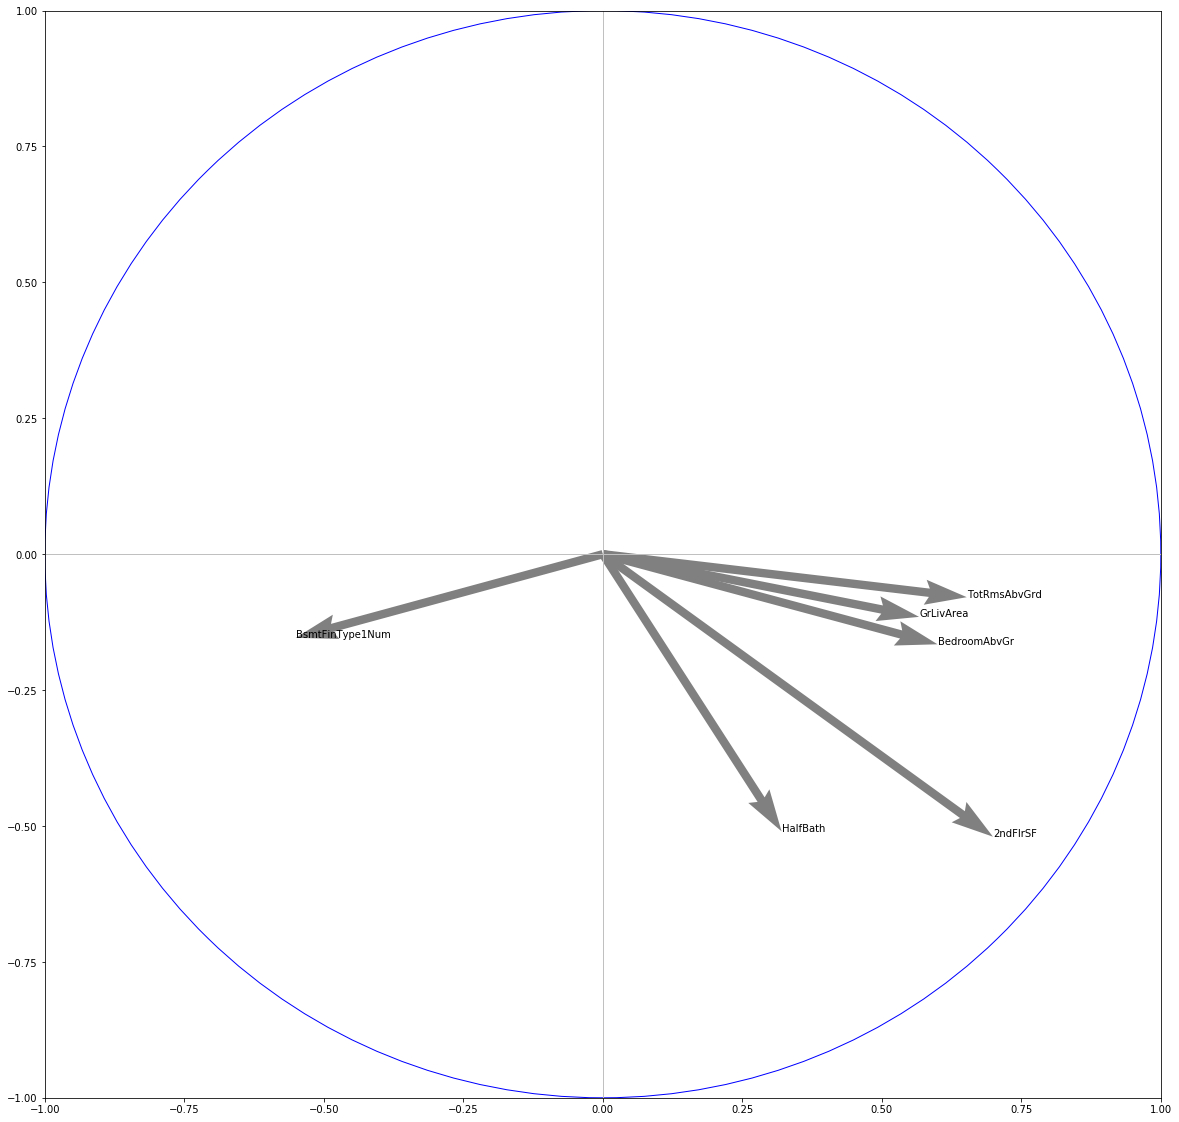

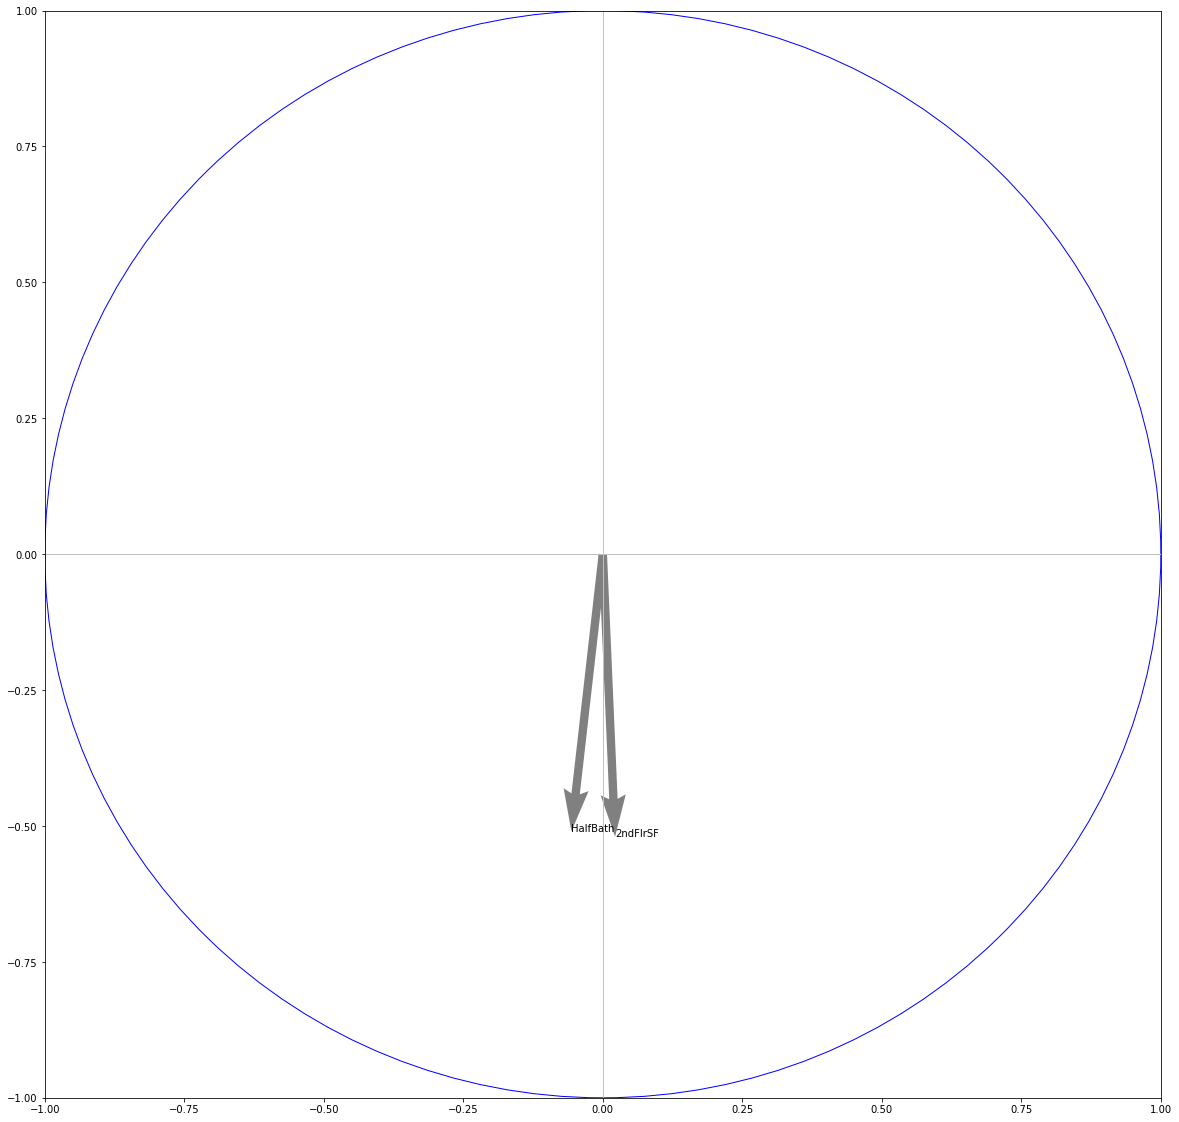

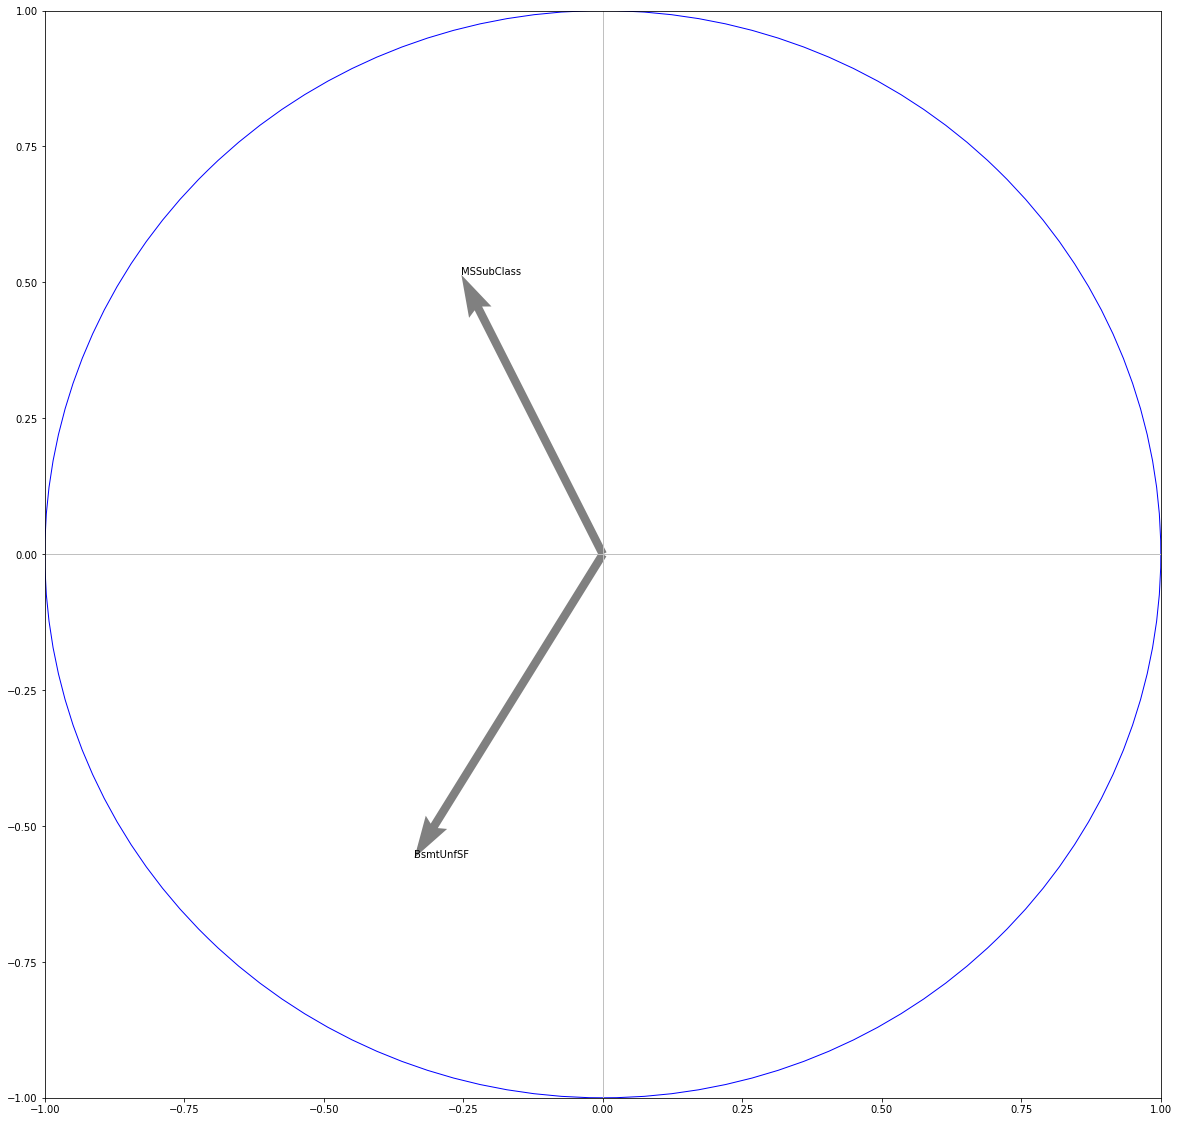

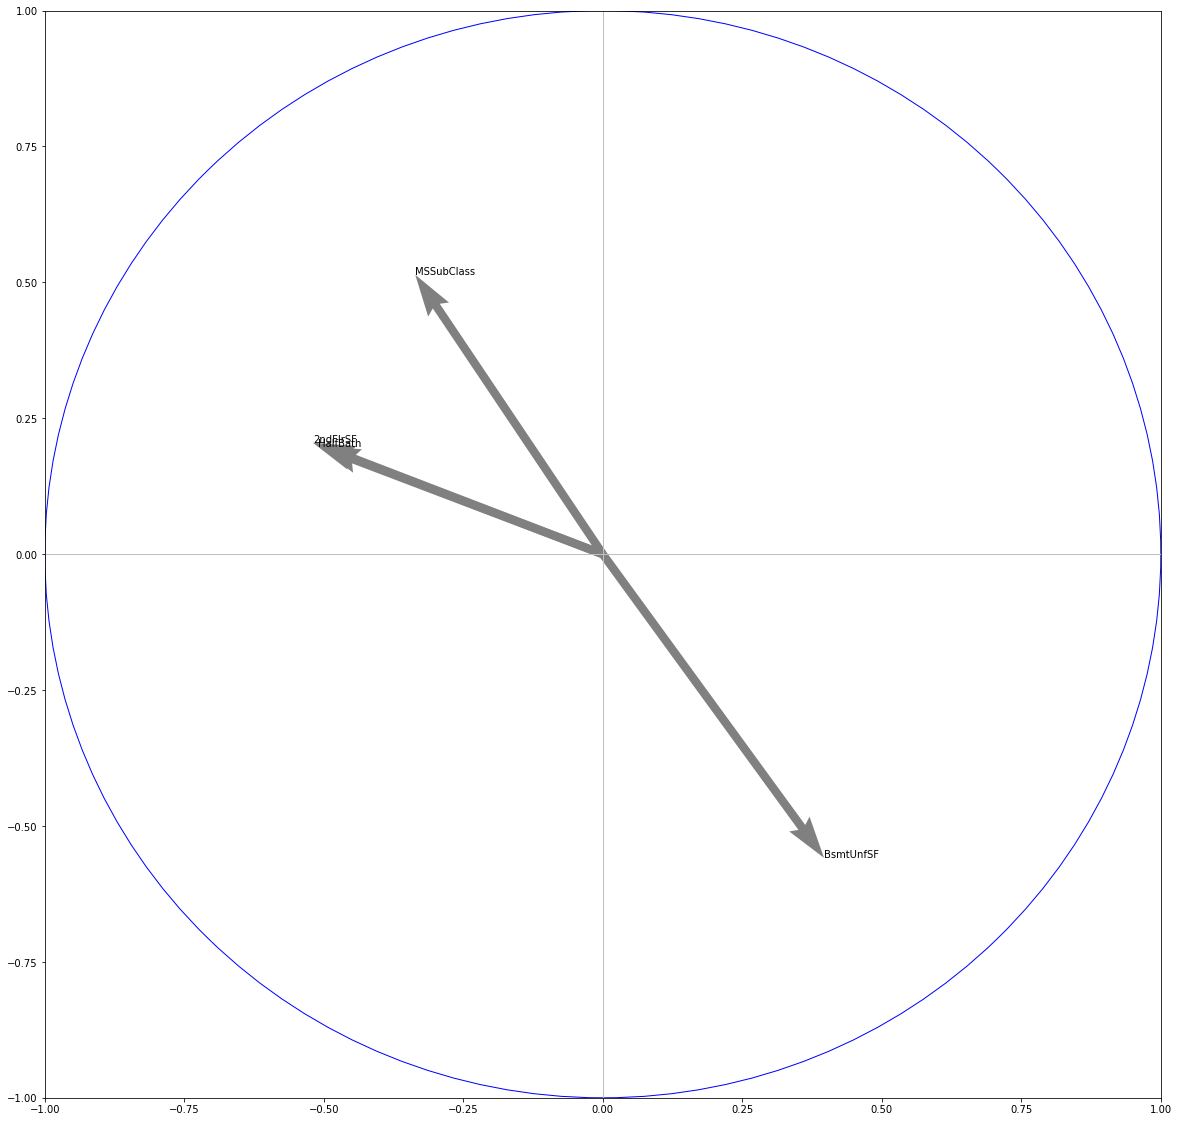

In [32]:
i = 0
for i in range(7):
    #cercle des corrélations
    fig, axes = plt.subplots(figsize=(20,20))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    #affichage des étiquettes (noms des variables)
    for j in range(nbr_values[i]):
        plt.annotate(labels[i][j],(my_axes[i][j][0],my_axes[i][j][1]))
        plt.quiver(my_axes[i][j][0],my_axes[i][j][1], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

    #ajouter les axes
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

    #ajouter un cercle
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes.add_artist(cercle)
    #affichage
    plt.show()

## Cosinus square variables

In [33]:
cos2var = corvar**2
print(pd.DataFrame({'id':data_ok.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

                 id    COS2_1    COS2_2
0        MSSubClass  0.003149  0.038878
1       LotFrontage  0.151780  0.010025
2           LotArea  0.079129  0.002543
3       OverallQual  0.725379  0.009813
4       OverallCond  0.060650  0.003720
..              ...       ...       ...
56    ElectricalNum  0.112345  0.045620
57    FunctionalNum  0.013495  0.022904
58    GarageTypeNum  0.281733  0.069828
59  GarageFinishNum  0.469135  0.011540
60         FenceNum  0.049460  0.002665

[61 rows x 3 columns]


## contributions
* We show for the first five axes

In [34]:
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

print(pd.DataFrame({'id':data_ok.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3],'CTR_5':ctrvar[:,4],'CTR_6':ctrvar[:,5]}))

                 id     CTR_1     CTR_2         CTR_3     CTR_4     CTR_5  \
0        MSSubClass  0.000266  0.009828  1.925378e-02  0.045422  0.122672   
1       LotFrontage  0.012839  0.002534  6.344584e-02  0.021411  0.018109   
2           LotArea  0.006694  0.000643  7.392455e-02  0.008900  0.003163   
3       OverallQual  0.061362  0.002481  2.755965e-03  0.000602  0.001210   
4       OverallCond  0.005131  0.000940  1.178353e-02  0.066655  0.059483   
..              ...       ...       ...           ...       ...       ...   
56    ElectricalNum  0.009504  0.011532  9.918333e-04  0.045709  0.012536   
57    FunctionalNum  0.001142  0.005790  4.839701e-03  0.006149  0.000012   
58    GarageTypeNum  0.023832  0.017652  3.312693e-07  0.001758  0.001403   
59  GarageFinishNum  0.039685  0.002917  5.542722e-03  0.000011  0.000316   
60         FenceNum  0.004184  0.000674  2.429807e-02  0.015850  0.010619   

       CTR_6  
0   0.009250  
1   0.020428  
2   0.001622  
3   0.009570  
